In [11]:
# The Bancor Algorithm and testing
class smart_token:
    def __init__(self, name, supply):
        self.name = name                     #"TOK"
        self.supply = supply                 #[TOK] circulating supply
    
    def printtok(self):
        print("Token Stats:")
        print("Token: ", self.name)
        print("Supply: ", self.supply)
        
    
class connector:
    def __init__(self, tokenname, balance, connectorweight):
        self.token   = tokenname       # name="CTOK", for example
        self.balance = balance         # [CTOK] balance
        self.weight  = connectorweight #

        
    def printcon(self):
        print("Connector Stats:")
        print("Token: ", self.token)
        print("Balance: ", self.balance)
        print("CWeight: ", self.weight)


class BancorExchange:
    
    def __init__(self, CW):
        self.CW = CW
        self.price = 0.0
        self.effective_price = 0.0

    def printf(self):
        print("CW: ", self.CW)
        print("Price: ", self.price)
        
    def CTOKtoTOK(self, tok, ctok, CTOKreceived):
        """TOK = HORUS, in the Bancor example
           CTOK  = BANCOR"""
        
        self.price = self.getprice(tok, ctok)
#         price = self.getprice(tok, ctok)
        
        # get TOKmarketcap
        marketcap = self.marketcap(self.price, tok.supply)
        
        # compute TOKissued
        TOKissued = self.TOKissued(tok.supply, ctok.balance, CTOKreceived, CW)
        
        # compute the effective price
        
        # remove TOK from TOKbalance
#         tok.supply += TOKissued # the total circulating supply increases
        tok.supply -= TOKissued # the total circulating supply increases
        
        # add CTOK to CTOKbalance
        ctok.balance += CTOKreceived  # the balance of CTOK increases
        
        # calculate the effective price
        self.effective_price =  1/( CTOKreceived/ (1.0*TOKissued) ) # this works
        
        # return TOKissued and effective price
        return (TOKissued)
    
    def TOKtoCTOK(self, tok, ctok, TOKreceived):      
        
        # get price
        self.price = self.getprice(tok, ctok)
        
        # get TOKmarketcap
        marketcap = self.marketcap(self.price, tok.supply)
        
        # compute CTOKissued
        CTOKissued = self.CTOKissued(tok.supply, ctok.balance, TOKreceived, CW)
        
        # remove CTOK from CTOKbalance
        ctok.balance -= CTOKissued
        
        # remove TOK to TOKbalance
#         tok.supply -= TOKreceived
        tok.supply += TOKreceived
        
        # calculate the effective price
        self.effective_price =   CTOKissued/ (1.0*TOKreceived)
        
        # return TOKissued and effective price
        return (CTOKissued)
        
        
    
        
        
    def updateCW(self, CTOKbalance, TOKmarketcap):
        CW = CTOKbalance / TOKmarketcap
        return (CW)
        
    def getprice(self, tok, ctok):
        balance   = ctok.balance
        TOKsupply = tok.supply
        price = balance/(TOKsupply*self.CW)
#         print("Price [EOS/HOR]:", price)
        return ( price )
    
    def marketcap(self,price, totalTOKsupply):
        marketcap = price * totalTOKsupply
        return ( marketcap )
    
    def CTOKissued(self, TOKsupply, CTOKbalance, TOKreceived, CW ):
        
        ctokissued = CTOKbalance * (( 1 + TOKreceived/TOKsupply)**(1/CW)-1 )
 
        return ( ctokissued )

    def TOKissued(self, TOKsupply, CTOKbalance, CTOKreceived, CW):
        
        tokensissued = TOKsupply*( (1+CTOKreceived/CTOKbalance)**(CW) -1)

        return( tokensissued )
                                   
                                

###########################################


# eoscon.price = 1
# eoscon.get_balanceValue()

# find the supply of HORUS on the EOS MAINNET
# $ cleos --url https://api.eosnewyork.io:443  get currency stats horustokenio "HORUS"
# {
#   "HORUS": {
#     "supply": "1200000000.0000 HORUS",
#     "max_supply": "1200000000.0000 HORUS",
#     "issuer": "horustokenio"
#   }


### Test: BNT->HORUS

Do a test trading BNT to HORUS


\$20,000 = 14,084.5070 BNT ( with Ethereum Price @ 1 BNT = \$1.42 )

\$20,000 = 1,652,755.9706 HORUS  ( with HORUS @ 1 HORUS = \$0.012 )


###### HORUS to BNT
1 HORUS = 118.3333 BNT


This graph is based off an initial supply of:

1652755.9706 HORUS

14084.5070 BNT


In [12]:
20000/1652755.9706

0.012100999999860477

## Recreate the Bancor example
See [Bacncor Example](https://docs.google.com/spreadsheets/d/1gZtQmb7rravEzu7UktWa5WRkTMe9NuJzEfyNBFn6LL8/edit#gid=1014885684)
* Initial supplies
    * BNT = 100
    * HORUS = 100
    * CW = 1

In [13]:
import numpy as np
import matplotlib.pyplot as plt

########## INPUTS ##########


# BNTbalance = 14084.5070 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
# HORUSsupply = 1652755.9706 
BNTbalance = 100 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
HORUSsupply = 100
############################

# HORUS Market Cap [BNT] = HORUS price [BNT] * HORUS supply
# CW =  BNT Balance [BNT] / HORUS Market Cap [BNT]

# Convert HORUS to BNT
HORUSmarketcap = BNTbalance # HORUSsupply / 118.333

CW = BNTbalance / HORUSmarketcap

print('CW :', CW)
ex = BancorExchange(CW)

horus = smart_token("HORUS", supply=HORUSsupply) # this is right
bnt = connector("BNT",BNTbalance, CW)


print("Test BNT->Horus")
print("BNTsupply:\t", bnt.balance)
for BNTrecieved in [8.0, 9.0, 10.0, 11.0, 3.4]:

    
    HORUSissued = ex.CTOKtoTOK(tok=horus,ctok=bnt,CTOKreceived=BNTrecieved)
    print("BNTsupply:\t", bnt.balance, "\tHORUSissued\t", HORUSissued, "\tPrice: ", ex.effective_price)
#     print("BNTsupply:\t", bnt.balance, "\tHORUSsupply\t", horus.supply)
    
horus = smart_token("HORUS", supply=HORUSsupply) # this is right
bnt = connector("BNT",BNTbalance, CW)
print("Test Horus->BNT")
for HORUSrecieved in [8, 9, 10, 11, 3.4]:

    print("BNTsupply:\t", bnt.balance, "BNTprice", ex.effective_price, "HORUSsupply", horus.supply)

    BNTissued = ex.TOKtoCTOK(tok=horus,ctok=bnt,TOKreceived=HORUSrecieved)

    

CW : 1.0
Test BNT->Horus
BNTsupply:	 100
BNTsupply:	 108.0 	HORUSissued	 8.000000000000007 	Price:  1.0000000000000009
BNTsupply:	 117.0 	HORUSissued	 7.66666666666666 	Price:  0.8518518518518511
BNTsupply:	 127.0 	HORUSissued	 7.207977207977202 	Price:  0.7207977207977202
BNTsupply:	 138.0 	HORUSissued	 6.680148955739513 	Price:  0.6072862687035921
BNTsupply:	 141.4 	HORUSissued	 1.7356065534543177 	Price:  0.5104725157218581
Test Horus->BNT
BNTsupply:	 100 BNTprice 0.5104725157218581 HORUSsupply 100
BNTsupply:	 92.0 BNTprice 1.0000000000000009 HORUSsupply 108
BNTsupply:	 84.33333333333334 BNTprice 0.8518518518518511 HORUSsupply 117
BNTsupply:	 77.12535612535613 BNTprice 0.7207977207977202 HORUSsupply 127
BNTsupply:	 70.44520716961662 BNTprice 0.6072862687035921 HORUSsupply 138


In [16]:
import numpy as np
import matplotlib.pyplot as plt

########## INPUTS ##########


# BNTbalance = 14084.5070 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
# HORUSsupply = 1652755.9706 
BNTbalance = 100 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
HORUSsupply = 100
############################

# HORUS Market Cap [BNT] = HORUS price [BNT] * HORUS supply
# CW =  BNT Balance [BNT] / HORUS Market Cap [BNT]

# Convert HORUS to BNT
HORUSmarketcap = BNTbalance # HORUSsupply / 118.333

CW = BNTbalance / HORUSmarketcap

print('CW :', CW)
ex = BancorExchange(CW)

# horus_supply = np.linspace(1000,2000,1000)
horus = smart_token("HORUS", supply=HORUSsupply)
bnt = connector("BNT",BNTbalance, CW)

price = []
hsupplylist = []
hsupply = horus.supply
hsupplymax = hsupply + 1000000


for CTOKrecieved in [8, 9, 10, 11, 3.4]:


    print("HORUSsupply:\t", horus.supply)
#     print("EOSbalance\t", bnt.balance)

    TOKissued = ex.CTOKtoTOK(tok=horus,ctok=bnt,CTOKreceived=CTOKrecieved)
    hsupplylist.append(horus.supply)
    price.append(ex.price)
#         price.append(1/ex.price) # flip units to [Horus/EOS]. Correct?
    hsupply = horus.supply

plt.figure(figsize=(14,8))
plt.plot(hsupplylist, price,'r', linewidth=2,label="CW= "+str(CW))
plt.title("Pricing vs TOK Supply")
plt.legend()
plt.ylabel("Price [CTOK/TOK]")
plt.xlabel("Supply [TOK]")
maximum = np.ceil(max(price)+1)
# plt.axis([HORUSsupply-100000,HORUSsupply+1050000,0, maximum])
plt.grid(True)
plt.show()

CW : 1.0
BNTsupply:	 100
BNTsupply:	 108.0
BNTsupply:	 117.0
BNTsupply:	 126.99999999999999
BNTsupply:	 138.0


CW : 1.0


/home/gp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars


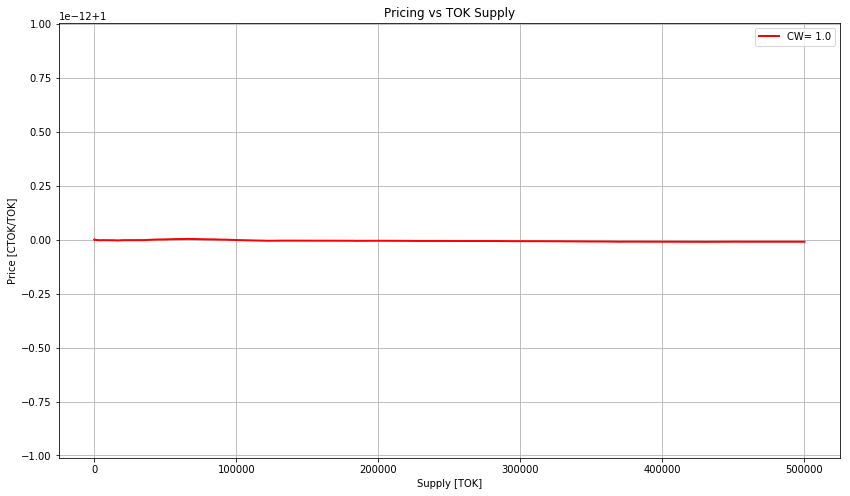

In [25]:
import numpy as np
import matplotlib.pyplot as plt
########## INPUTS ##########


BNTbalance = 100 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
HORUSsupply = 100 

############################

# HORUS Market Cap [BNT] = HORUS price [BNT] * HORUS supply
# CW =  BNT Balance [BNT] / HORUS Market Cap [BNT]

# Convert HORUS to BNT
HORUSmarketcap = BNTbalance # HORUSsupply / 118.333

CW = BNTbalance / HORUSmarketcap

print('CW :', CW)
ex = BancorExchange(CW)

horus = smart_token("HORUS", supply=HORUSsupply)
bnt = connector("BNT",BNTbalance, CW)

price = []
hsupplylist = []
hsupply = horus.supply
# CTOK_list = np.linspace(horus.supply, horus.supply + 1000000, 1000) # creates a list from min to max with 1000 points
CTOK_list = np.linspace(0, 1000, 1000) # creates a list from min to max with 1000 points

for CTOKrecieved in CTOK_list:

#     CTOKrecieved = 1000
    TOKissued = ex.CTOKtoTOK(tok=horus,ctok=bnt,CTOKreceived=CTOKrecieved)
    hsupplylist.append(horus.supply)
    price.append(ex.price)
    hsupply = horus.supply


plt.figure(figsize=(14,8))
plt.plot(hsupplylist, price,'r', linewidth=2,label="CW= "+str(CW))
plt.title("Pricing vs TOK Supply")
plt.legend()
plt.ylabel("Price [CTOK/TOK]")
plt.xlabel("Supply [TOK]")
maximum = np.ceil(max(price)+1)
# plt.axis([HORUSsupply-100000,HORUSsupply+1050000,0, maximum])
plt.grid(True)
plt.show()



### Test: HORUS->BNT
Start with an initial balance of 1000 HORUS and 250 EOS and observe how the price of HORUS changes with each exchange from HORUS to EOS.

CW : 1.0


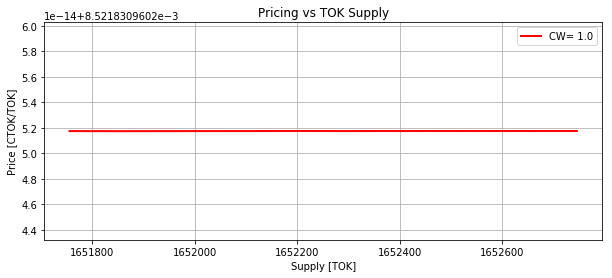


TOK Issued:	 0.08521830960255973
TOKsupply:	 1651755.9706
BNTbalance:	 14075.985169039735
CW:		 1.0
Price:		 0.008521830960251737


In [13]:
import numpy as np
import matplotlib.pyplot as plt

########## INPUTS ##########

BNTbalance = 14084.5070 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
HORUSsupply = 1652755.9706 

############################

# HORUS Market Cap [BNT] = HORUS price [BNT] * HORUS supply
# CW =  BNT Balance [BNT] / HORUS Market Cap [BNT]

# Convert HORUS to BNT
HORUSmarketcap = BNTbalance # HORUSsupply / 118.333

CW = BNTbalance / HORUSmarketcap

print('CW :', CW)
ex = BancorExchange(CW)

# horus_supply = np.linspace(1000,2000,1000)
horus = smart_token("HORUS", supply=HORUSsupply)
bnt = connector("BNT",BNTbalance, CW)

price = []
hsupplylist = []
hsupply = horus.supply
while (hsupply > HORUSsupply-1000):

    TOKrecieved = 10
    #print("tok.supply = ", horus.supply)
    #print("CW = ", ex.CW)
    #print("CTOK.balance ", eos.balance)
    CTOKissued = ex.TOKtoCTOK(tok=horus, ctok=bnt, TOKreceived=TOKrecieved)
#         print(CTOKissued)
    hsupply = horus.supply
    hsupplylist.append(horus.supply)
    price.append(ex.price)
#         price.append(1/ex.price) # this flips the units to [Horus/EOS]. Correct?



plt.figure(figsize=(10,4))
plt.plot(hsupplylist, price,'r', linewidth=2,label="CW= "+str(CW))
plt.title("Pricing vs TOK Supply")
plt.legend()
plt.ylabel("Price [CTOK/TOK]")
plt.xlabel("Supply [TOK]")
#     plt.axis([900,2100,0,4.])
plt.grid(True)
plt.show()

print()
print("TOK Issued:\t",     CTOKissued)
print("TOKsupply:\t",      horus.supply)
print("BNTbalance:\t",     bnt.balance)
print("CW:\t\t",           ex.CW)
print("Price:\t\t",        ex.price)
#     print("Effective Price:", exchange.effective_price)



## Conclusion
The basics of the bancor algorithm are listed above. These plots don't quite match the Bancor whitepaper exactly so we should see where their algorithm differs from ours. Some of the initial balance values will make the plots differ in their scale, but the share should be similar.

### ToDo: 
* Incorporate the 10 day time lag into the formula 
* Produce some test cases to make sure the algorithm works
* code it up in EOS!
